#### Question: Given a plot of a story find out which genre it belongs
#### categorise a comment as spoiler or not spoiler

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud.wordcloud import WordCloud

In [20]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [21]:
# movieReviews = pd.read_json('./IMDB_reviews.json', lines=True)
# movieReviews.head()

In [36]:
print("Movie shape: ",movieDetails.shape)
print("Null values: ",movieDetails.isnull().values.any())

# movieDetails[movieDetails["plot_synopsis"].notna()]
movieDetails["plot_synopsis"].notna().unique()
print(type(movieDetails["plot_synopsis"][2]))

Movie shape:  (1572, 7)
Null values:  False
<class 'str'>


# visualizing the dataset

In [40]:
#https://www.youtube.com/watch?v=zCznZoKnfBA&ab_channel=RSREETech-NLP%2FAI%2FMLsimplified

### visual 1 -> counts per rating

Text(0.5, 1.0, 'Counts per rating')

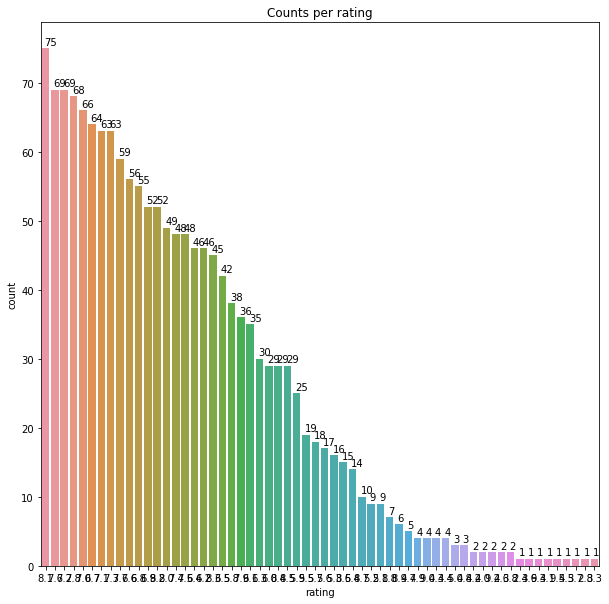

In [47]:
plt.figure(figsize=(10,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

In [55]:

# movieDetails.groupby("genre").count()
movieDetails.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
